<a href="https://colab.research.google.com/github/alwaysalearner1234/ML02/blob/main/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
dataset.data.shape


(1797, 64)

In [4]:
dataset.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
dataset.data[0].reshape(8,8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

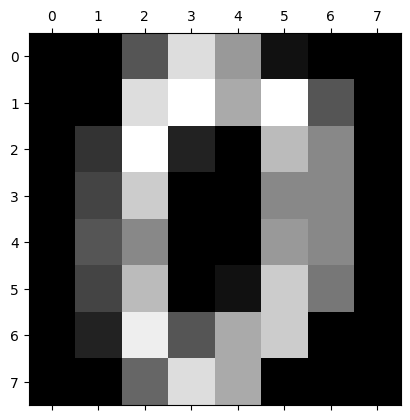

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

<Figure size 640x480 with 0 Axes>

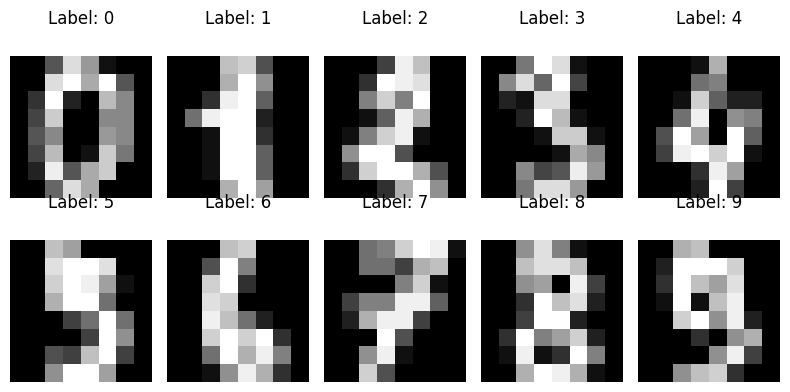

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
dataset = load_digits()

# Set grayscale for better visualization
plt.gray()

# Create a figure with 2 rows and 5 columns (to show first 10 images)
fig, axes = plt.subplots(2, 5, figsize=(8, 4))

# Flatten the 2D axes array into 1D for easy iteration
axes = axes.flatten()

# Display the first 10 images
for i in range(10):
    axes[i].matshow(dataset.data[i].reshape(8, 8))
    axes[i].set_title(f"Label: {dataset.target[i]}")
    axes[i].axis('off')  # Hide the axis for cleaner display

# Adjust spacing between images
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

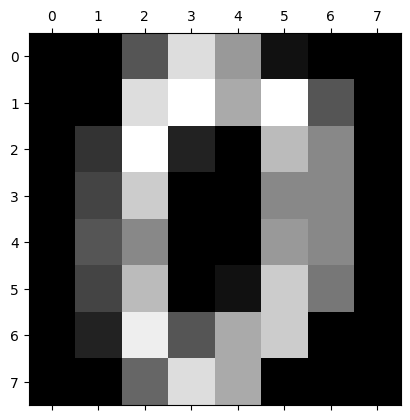

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

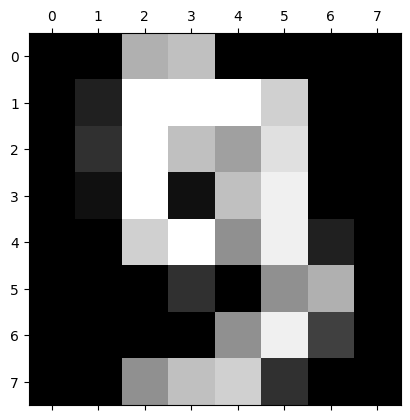

In [9]:
plt.matshow(dataset.data[9].reshape(8,8))


In [10]:
dataset.target[:5]


array([0, 1, 2, 3, 4])

In [11]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
dataset.target


array([0, 1, 2, ..., 8, 9, 8])

In [13]:
df.describe()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [14]:
X = df
y = dataset.target

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

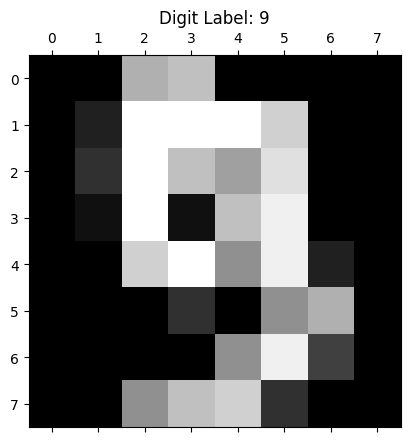

In [16]:
plt.matshow(dataset.data[9].reshape(8,8), cmap='gray')
plt.title(f"Digit Label: {dataset.target[9]}")
plt.show()

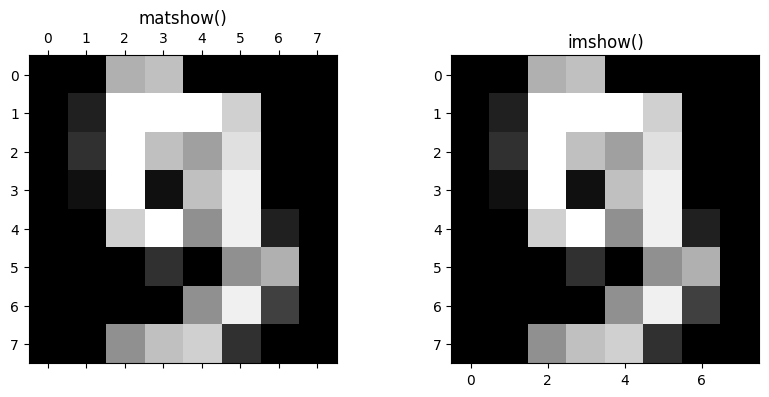

In [17]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
img = digits.data[9].reshape(8,8)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("matshow()")
plt.matshow(img, cmap='gray', fignum=False)   # fignum=False to prevent new figure

plt.subplot(1,2,2)
plt.title("imshow()")
plt.imshow(img, cmap='gray', interpolation='nearest')

plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original:\n", X)
print("\nScaled:\n", np.round(X_scaled, 2))


Original:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Scaled:
 [[-1.22 -1.22 -1.22]
 [ 0.    0.    0.  ]
 [ 1.22  1.22  1.22]]


🚀 When to use StandardScaler

Use it before training models that are sensitive to feature scales, such as:

Logistic Regression

SVM

KNN

PCA

Neural Networks

StandardScaler is part of sklearn’s preprocessing module.

It is used to standardize (normalize) your features — i.e., make them have:

Mean = 0

Standard deviation = 1

This helps machine learning models perform better and converge faster (especially distance-based models like KNN, SVM, Logistic Regression, etc.).

2️⃣ Create the scaler
scaler = StandardScaler()


You’re creating an instance of the scaler.

At this point, it hasn’t yet learned anything about your data — it’s just ready to be fit.

3️⃣ Fit and transform the data
X_scaled = scaler.fit_transform(X)


fit() → Calculates the mean and standard deviation for each feature in X.

transform() → Uses those values to scale each column (feature) in X.

📘 Mathematically:

𝑋
scaled
=
𝑋
−
𝜇
𝜎
X
scaled
	​

=
σ
X−μ
	​


where

𝜇
μ = mean of each feature

𝜎
σ = standard deviation of each feature

4️⃣ Result
X_scaled


This gives you a new NumPy array with the same shape as X, but scaled.

Each feature (column) now has:

Mean ≈ 0

Standard deviation ≈ 1

✅ Example
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original:\n", X)
print("\nScaled:\n", np.round(X_scaled, 2))


🧮 Output:

Original:
 [[1 2 3]
  [4 5 6]
  [7 8 9]]

Scaled:
 [[-1.22 -1.22 -1.22]
  [ 0.    0.    0.  ]
  [ 1.22  1.22  1.22]]

🚀 When to use StandardScaler

Use it before training models that are sensitive to feature scales, such as:

Logistic Regression

SVM

KNN

PCA

Neural Networks

Feature Scaling


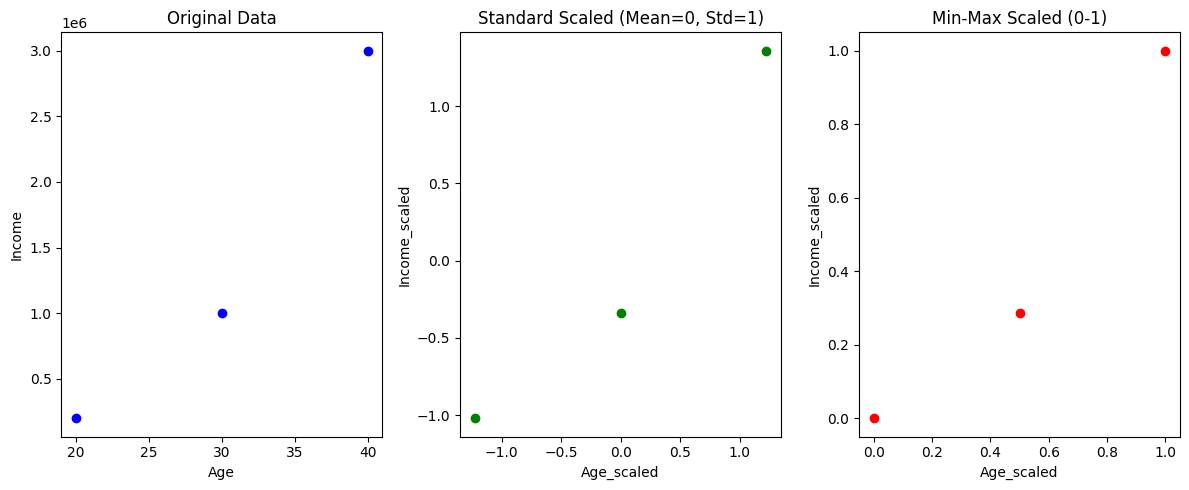

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample data: Age and Income
X = np.array([[20, 200000],
              [30, 1000000],
              [40, 3000000]])

# Before scaling
age = X[:,0]
income = X[:,1]

# StandardScaler
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
age_std = X_std[:,0]
income_std = X_std[:,1]

# MinMaxScaler
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)
age_mm = X_mm[:,0]
income_mm = X_mm[:,1]

# Plotting
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.scatter(age, income, color='blue')
plt.title("Original Data")
plt.xlabel("Age")
plt.ylabel("Income")

plt.subplot(1,3,2)
plt.scatter(age_std, income_std, color='green')
plt.title("Standard Scaled (Mean=0, Std=1)")
plt.xlabel("Age_scaled")
plt.ylabel("Income_scaled")

plt.subplot(1,3,3)
plt.scatter(age_mm, income_mm, color='red')
plt.title("Min-Max Scaled (0-1)")
plt.xlabel("Age_scaled")
plt.ylabel("Income_scaled")

plt.tight_layout()
plt.show()


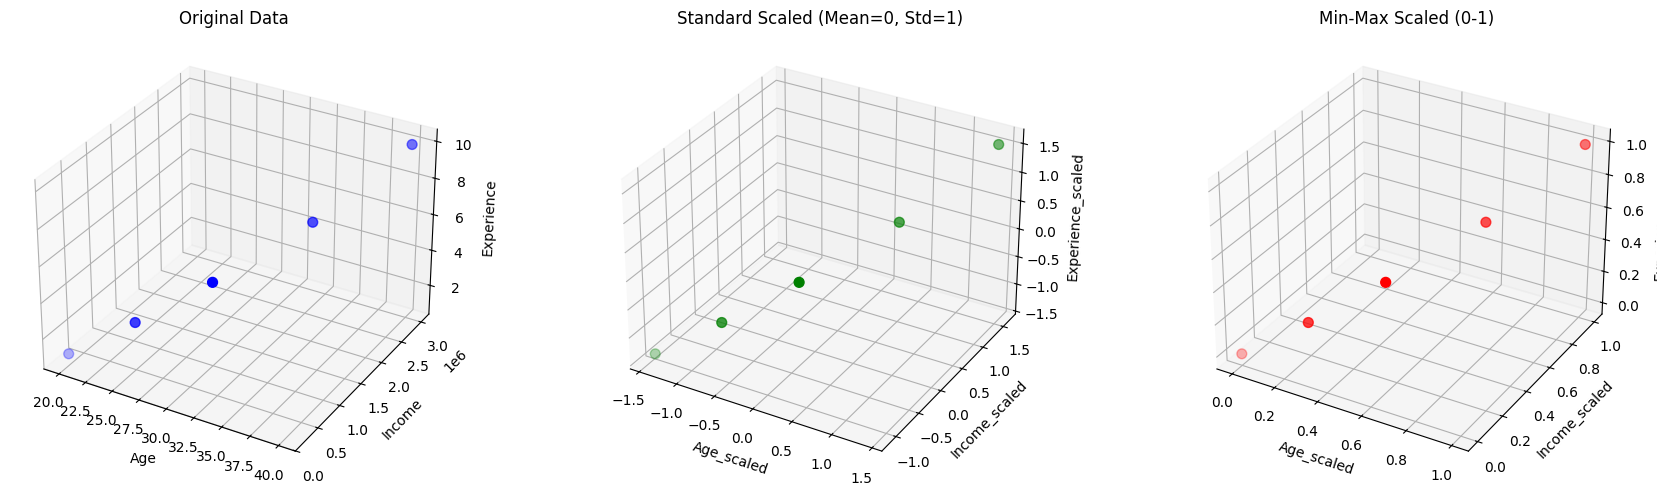

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

# Sample data: Age, Income, and Experience (years)
X = np.array([[20, 200000, 1],
              [30, 1000000, 5],
              [40, 3000000, 10],
              [25, 500000, 3],
              [35, 2000000, 7]])

# Original
age, income, exp = X[:,0], X[:,1], X[:,2]

# Standard Scaling
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
age_std, income_std, exp_std = X_std[:,0], X_std[:,1], X_std[:,2]

# Min-Max Scaling
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)
age_mm, income_mm, exp_mm = X_mm[:,0], X_mm[:,1], X_mm[:,2]

# Plotting
fig = plt.figure(figsize=(18,5))

# Original Data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(age, income, exp, color='blue', s=50)
ax1.set_title("Original Data")
ax1.set_xlabel("Age")
ax1.set_ylabel("Income")
ax1.set_zlabel("Experience")

# Standard Scaled
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(age_std, income_std, exp_std, color='green', s=50)
ax2.set_title("Standard Scaled (Mean=0, Std=1)")
ax2.set_xlabel("Age_scaled")
ax2.set_ylabel("Income_scaled")
ax2.set_zlabel("Experience_scaled")

# Min-Max Scaled
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(age_mm, income_mm, exp_mm, color='red', s=50)
ax3.set_title("Min-Max Scaled (0-1)")
ax3.set_xlabel("Age_scaled")
ax3.set_ylabel("Income_scaled")
ax3.set_zlabel("Experience_scaled")

plt.tight_layout()
plt.show()


In [22]:
print("X_scaled length:", X_scaled.shape[0])
print("y length:", len(y))


X_scaled length: 3
y length: 1797


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

ValueError: Found input variables with inconsistent numbers of samples: [3, 1797]

In [26]:
y = []         # empty list
y = np.array([])  # empty array


In [27]:
X_scaled = scaler.fit_transform(X)  # 3 rows
y = y_original[y_filtered]           # maybe filtered to 0 rows accidentally


NameError: name 'y_original' is not defined

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample dataset
# X = 3 samples, 2 features
X = np.array([
    [1, 10],
    [2, 20],
    [3, 30]
])

# y = labels for each sample
y = np.array([0, 1, 0])  # must have the same number of rows as X

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check shapes
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)
# Output:
# X_scaled shape: (3, 2)
# y shape: (3,)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=30
)

# Check splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_scaled shape: (3, 2)
y shape: (3,)
X_train shape: (2, 2)
X_test shape: (1, 2)
y_train shape: (2,)
y_test shape: (1,)


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.0

Use PCA to reduce dimensions


In [29]:
X


array([[ 1, 10],
       [ 2, 20],
       [ 3, 30]])

Use components such that 95% of variance is retained


In [31]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(3, 1)

In [ ]:
pca.explained_variance_ratio_

PCA created 29 components out of 64 original columns

In [32]:
X_pca


array([[-10.04987562],
       [  0.        ],
       [ 10.04987562]])

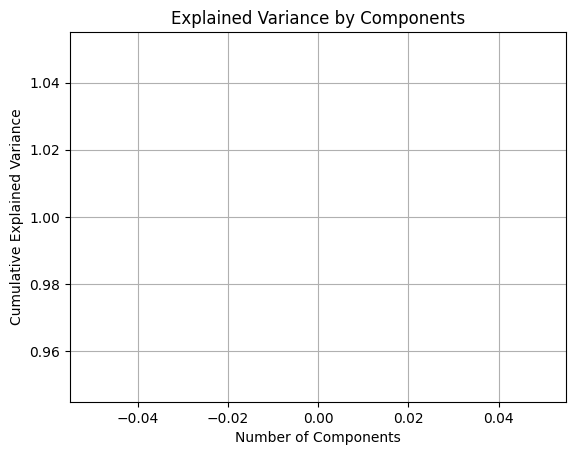

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


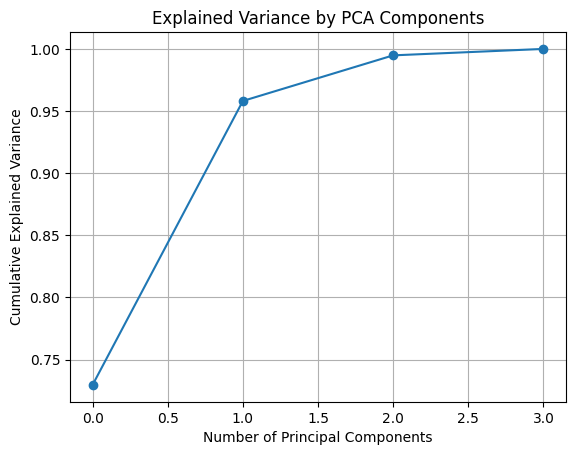

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data  # only features

# Step 1: Standardize (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Show explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Step 4: Plot cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


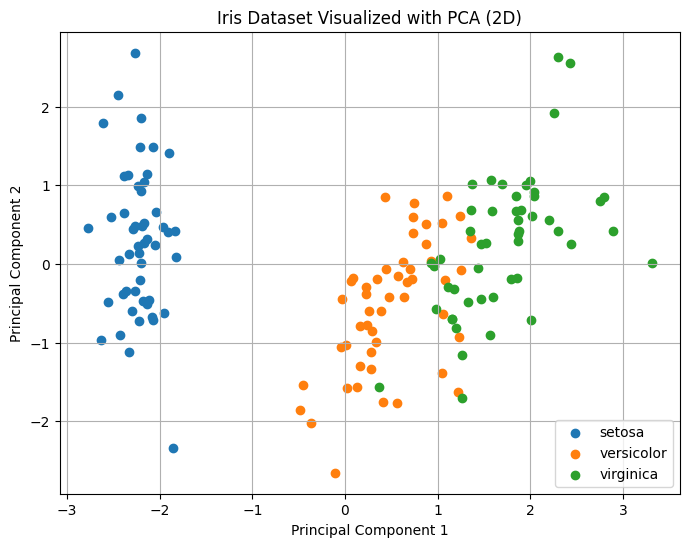

Explained Variance Ratio: [0.72962445 0.22850762]
Total variance captured: 95.81 %


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 1️⃣ Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Apply PCA (reduce to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3️⃣ Plot the PCA-reduced data
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=target_name
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset Visualized with PCA (2D)')
plt.legend()
plt.grid(True)
plt.show()

# 4️⃣ Check explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", round(sum(pca.explained_variance_ratio_) * 100, 2), "%")


In [36]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9333333333333333

Let's now select only two components

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(150, 2)

In [39]:
X_pca


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [40]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9666666666666667

Let's now select only two components

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(150, 2)

In [43]:
X_pca


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [44]:
pca.explained_variance_ratio_


array([0.92461872, 0.05306648])

You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information

In [45]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9666666666666667

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy